# Classificação com dados desbalanceados

## Carregamento da base de dados

In [1]:
import pandas as pd
import random
import numpy as np

In [3]:
dataset = pd.read_csv('credit_data.csv')

In [5]:
dataset.shape

(2000, 5)

In [6]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [13]:
dataset.dropna(inplace=True) # Retirando dados nulos
dataset.shape

(1997, 5)

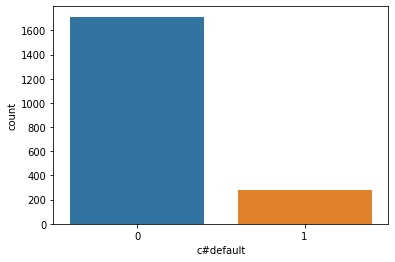

In [15]:
import seaborn as sns
sns.countplot(x=dataset['c#default']); # Plotando gráfico da coluna 'c#default'

In [16]:
X = dataset.iloc[:, 1:4].values # Colocando as 3 colunas e seus valores na variável 'X'

In [17]:
X.shape

(1997, 3)

In [18]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [19]:
y = dataset.iloc[:, 4].values # Retirando somente a coluna 4 e inserindo na variável 'y'

In [20]:
y.shape

(1997,)

In [22]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Base de treinamento e teste

In [25]:
from sklearn.model_selection import train_test_split # Função para fazer amostra estratificada

In [36]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [37]:
X_treinamento.shape, y_treinamento.shape # 80% da base de dados que será utilizada para treinamento

((1597, 3), (1597,))

In [28]:
X_teste.shape, y_teste.shape # 20% da base de dados que será utilizada para teste

((400, 3), (400,))

In [38]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [39]:
1714 / len(dataset), 283 / len(dataset) # Isso demonstra que os clientes que pagam o empréstimo (classe 0) representam 85% da base de dados e os clientes que não pagam empréstimo (classe 1) representam 14% da base de dados

(0.8582874311467201, 0.14171256885327993)

In [41]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [42]:
226 / len(y_treinamento) # Indica que a amostra estratificada foi feita corretamente

0.14151534126487164

In [44]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [43]:
57 / len(y_teste)

0.1425

## Classificação com Naïve Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB # Algoritmo para classificação de probabilidades

In [50]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento) # Encaixando o algoritmo Naive Bayes na base de treinamento

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
previsoes = modelo.predict(X_teste) # Fazendo a previsão de cada um dos registros 

In [52]:
previsoes

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [54]:
y_teste

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [60]:
from sklearn.metrics import accuracy_score # Função para fazer comparativo entre o que o algoritmo classificou corretamente e o resultado real

In [61]:
accuracy_score(previsoes, y_teste)

0.9325

In [62]:
from sklearn.metrics import confusion_matrix # Algoritmo para gerar matriz de confusão

In [65]:
cm = confusion_matrix(previsoes, y_teste) # Divisão dos registros classificados corretamente e incorretamente
cm

array([[339,  23],
       [  4,  34]])

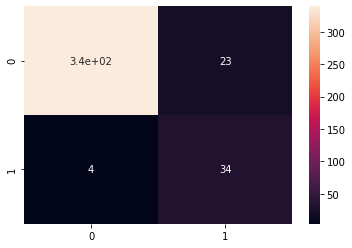

In [66]:
sns.heatmap(cm, annot=True);

In [67]:
(336 + 32) / (336 + 25 + 7 + 32)

0.92

In [68]:
# Percentual de acerto para pessoas que pagam o empréstimo
336 / (336 + 25)

0.9307479224376731

In [69]:
# Percentual de acerto para pessoas que não pagam o empréstimo
32 / (32 + 7)

0.8205128205128205

In [73]:
# Perdas: 5.000
# Clientes não pagadores: 1.000
1000 * 18 / 100

180.0

In [74]:
180 * 5000

900000

## Subamostragem (undersampling) - Tomek links

Link para documentação
- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [76]:
from imblearn.under_sampling import TomekLinks # Técnica para encontrar os registros que são parecidos das duas classes para apagar os registros da classe majoritária

In [80]:
tl = TomekLinks(sampling_strategy='majority') # 'majority' ira apagar somente os registros da classe majoritária
X_under, y_under = tl.fit_sample(X, y) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [81]:
X_under.shape, y_under.shape # Removeu 100 registros da base de dados de classe 0

((1897, 3), (1897,))

In [87]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [88]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [89]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [92]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9263157894736842

In [93]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[317,  22],
       [  6,  35]])

In [94]:
315 / (315 + 26)

0.9237536656891495

In [95]:
31 / (31 + 8)

0.7948717948717948

## Sobreamostragem (oversampling) - SMOTE

In [96]:
from imblearn.over_sampling import SMOTE

In [98]:
smote = SMOTE(sampling_strategy='minority') # Criação do algoritmo 'smote'
X_over, y_over = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [100]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [101]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [102]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [112]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [116]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [117]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9154518950437318

In [118]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[305,  20],
       [ 38, 323]])

In [119]:
305 / (305 + 19)

0.941358024691358

In [108]:
324 / (324 + 38)

0.8950276243093923

In [120]:
# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 11 / 100

110.0

In [110]:
110 * 5000

550000

In [111]:
900000 - 550000

350000